In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib.image as mpimg
import PIL
from PIL import Image 
import scipy as sy
from scipy.ndimage.filters import convolve
from skimage import transform 
from skimage import filters
from skimage.color import rgb2hsv 
from skimage.color import hsv2rgb
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

In [ ]:
path = '/content/drive/MyDrive/msml_640/Aisin_Yaaqob_ASN3/'

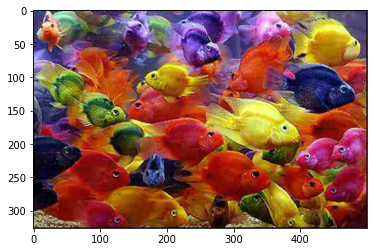

In [ ]:
fish = mpimg.imread(path+'fish.jpg')

plt.figure()
plt.imshow(fish)

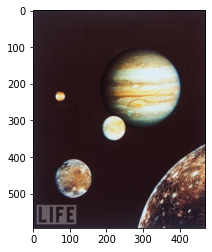

In [ ]:
jupiter = mpimg.imread(path+'jupiter.jpg')

plt.figure()
plt.imshow(jupiter)

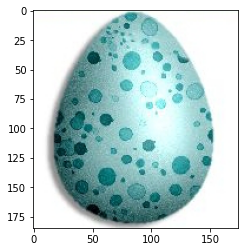

In [ ]:
egg = mpimg.imread(path+'egg.jpg')

plt.figure()
plt.imshow(egg)

# ***Programming Part 1***

## **quantizeRGB.py**

In [ ]:
def quantizeRGB(ogImg,k):
  h,w,c = ogImg.shape
  data = np.reshape(ogImg,(h*w,c))
  data = np.array(data)

  km = KMeans(n_clusters=k).fit(data)
  labels = km.labels_
  meanColor = km.cluster_centers_
  labels = np.reshape(labels, (h,w))

  outputImg = np.zeros((h,w,c))

  for i in range(0,h):
    for j in range(0,w):
      outputImg[i,j,:] = meanColor[labels[i,j],:]
  
  outputImg = np.array(outputImg,dtype='uint8')

  return outputImg, meanColor


## **quantizeHSV.py**

In [ ]:
def quantizeHSV(inputImg, k):
  h,w,_ = inputImg.shape
  data = np.reshape(inputImg[:,:,0],(h*w,1))

  km = KMeans(n_clusters=k).fit(data)
  labels = km.labels_
  meanColor = km.cluster_centers_
  labels = np.reshape(labels, (h,w))

  outputImg = inputImg

  for i in range(0,h):
    for j in range(0,w):
      outputImg = np.array(outputImg,dtype='uint8')
      outputImg[i,j,0] = meanColor[labels[i,j],0]
  return outputImg, meanColor

## **computeQuantizationError.py**

In [ ]:
def computeQuantizationError(ogImg,quantImg):
  error = np.square(ogImg-quantImg)
  h,w,c = ogImg.shape
  s = h*w*c
  error = (np.sum(error[:]))/s
  return error

## **getHueHists.py**

In [ ]:
def getHueHists(Img, k):
  HSV_double = rgb2hsv(Img)
  HSV_double = np.array(HSV_double, dtype='double')
  
  HSV_uint8 = np.array(HSV_double*255,dtype='uint8')

  output,_ = quantizeHSV(HSV_uint8,k)

  C,_ = np.histogram(output[:,:,1],bins=k)

  counts,N = np.histogram(HSV_uint8,bins=k)

  n = np.round(N-1).astype(int)
  histEqual = np.zeros((1,255))
  histEqual[:,n[1:len(n)]] = counts

  histClustered = np.zeros((1,255))
  histClustered[:,n[1:len(n)]] = C

  return histEqual, histClustered

## **colorQuantizeMain.py**

Text(0.5, 1.0, 'Original fish.jpg')

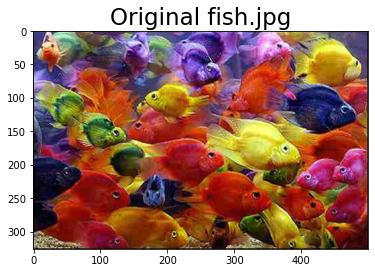

In [ ]:
#plotting the original image of fish.jpg

plt.figure(figsize=(6,6))
plt.imshow(fish)
plt.title('Original fish.jpg',fontsize=23)

108.44947034764826

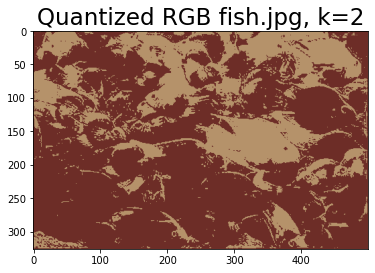

In [ ]:
# plotting RGB fish with k=2
RGB_fish_k2,RGB_fish_mean_k2 = quantizeRGB(fish,2) 

plt.figure(figsize=(6,6))
plt.imshow(RGB_fish_k2)
plt.title('Quantized RGB fish.jpg, k=2',fontsize=23)

computeQuantizationError(fish,RGB_fish_k2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

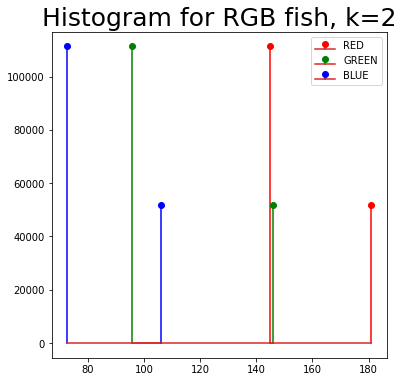

In [ ]:
COUNTS1,X1 = np.histogram(RGB_fish_k2[:,:,0],bins=2)
COUNTS2,X2 = np.histogram(RGB_fish_k2[:,:,1],bins=2)
COUNTS3,X3 = np.histogram(RGB_fish_k2[:,:,2],bins=2)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='RED')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='GREEN')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='BLUE')
plt.title('Histogram for RGB fish, k=2',fontsize=25)
plt.legend()

102.39796932515337

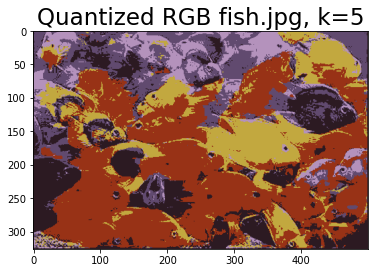

In [ ]:
# plotting RGB fish with k=5
RGB_fish_k5,RGB_fish_mean_k5 = quantizeRGB(fish,5) 

plt.figure(figsize=(6,6))
plt.imshow(RGB_fish_k5)
plt.title('Quantized RGB fish.jpg, k=5',fontsize=23)

computeQuantizationError(fish,RGB_fish_k5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

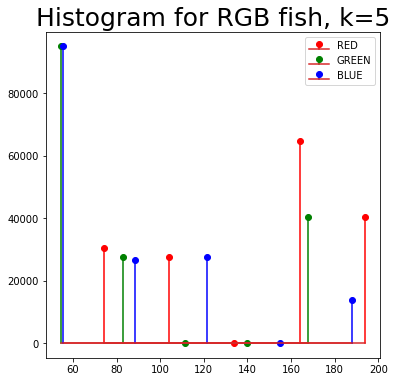

In [ ]:
COUNTS1,X1 = np.histogram(RGB_fish_k5[:,:,0],bins=5)
COUNTS2,X2 = np.histogram(RGB_fish_k5[:,:,1],bins=5)
COUNTS3,X3 = np.histogram(RGB_fish_k5[:,:,2],bins=5)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='RED')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='GREEN')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='BLUE')
plt.title('Histogram for RGB fish, k=5',fontsize=25)
plt.legend()

97.14157668711657

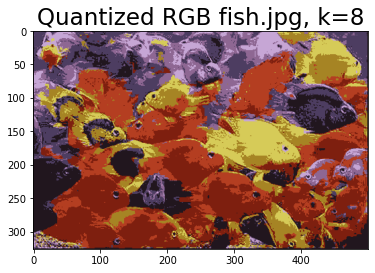

In [ ]:
# plotting RGB fish with k=8
RGB_fish_k8,RGB_fish_mean_k8 = quantizeRGB(fish,8) 

plt.figure(figsize=(6,6))
plt.imshow(RGB_fish_k8)
plt.title('Quantized RGB fish.jpg, k=8',fontsize=23)

computeQuantizationError(fish,RGB_fish_k8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

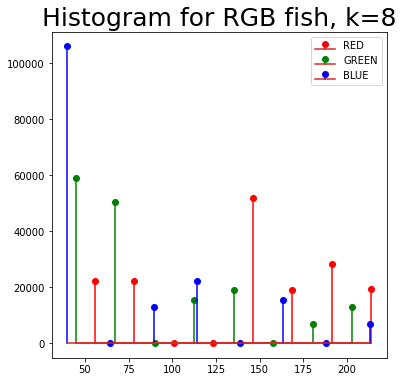

In [ ]:
COUNTS1,X1 = np.histogram(RGB_fish_k8[:,:,0],bins=8)
COUNTS2,X2 = np.histogram(RGB_fish_k8[:,:,1],bins=8)
COUNTS3,X3 = np.histogram(RGB_fish_k8[:,:,2],bins=8)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='RED')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='GREEN')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='BLUE')
plt.title('Histogram for RGB fish, k=8',fontsize=25)
plt.legend()

0.0

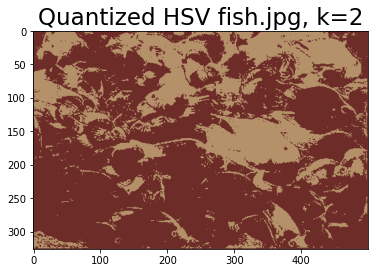

In [ ]:
# plotting HSV fish with k=2
input_HSV_fish_k2 = rgb2hsv(RGB_fish_k2)
input_HSV_fish_k2_uint8 = np.array(input_HSV_fish_k2*255,dtype='uint8')

HSV_fish_k2,HSV_fish_mean_k2 = quantizeHSV(input_HSV_fish_k2_uint8,2) 


plt.figure(figsize=(6,6))
plt.imshow(hsv2rgb(HSV_fish_k2))
plt.title('Quantized HSV fish.jpg, k=2',fontsize=23)

computeQuantizationError(input_HSV_fish_k2_uint8,HSV_fish_k2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

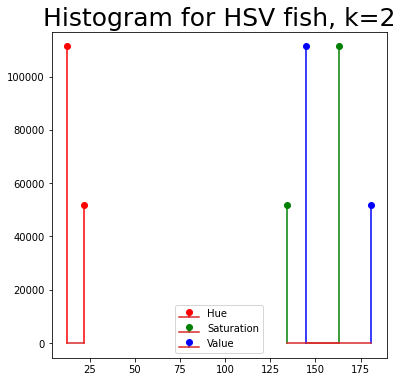

In [ ]:
COUNTS1,X1 = np.histogram(HSV_fish_k2[:,:,0],bins=2)
COUNTS2,X2 = np.histogram(HSV_fish_k2[:,:,1],bins=2)
COUNTS3,X3 = np.histogram(HSV_fish_k2[:,:,2],bins=2)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='Hue')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='Saturation')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='Value')
plt.title('Histogram for HSV fish, k=2',fontsize=25)
plt.legend()

0.20107361963190185

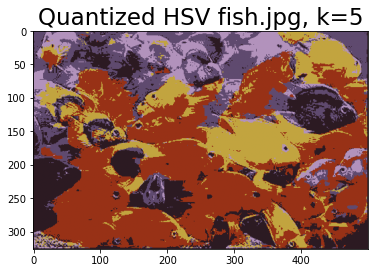

In [ ]:
# plotting HSV fish with k=5
input_HSV_fish_k5 = rgb2hsv(RGB_fish_k5)
input_HSV_fish_k5_uint8 = np.array(input_HSV_fish_k5*255,dtype='uint8')

HSV_fish_k5,HSV_fish_mean_k5 = quantizeHSV(input_HSV_fish_k5_uint8,5) 


plt.figure(figsize=(6,6))
plt.imshow(hsv2rgb(HSV_fish_k5))
plt.title('Quantized HSV fish.jpg, k=5',fontsize=23)

computeQuantizationError(input_HSV_fish_k5_uint8,HSV_fish_k5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

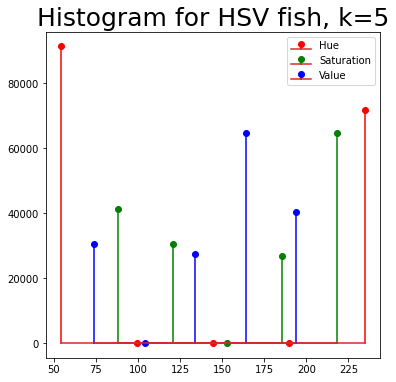

In [ ]:
COUNTS1,X1 = np.histogram(HSV_fish_k5[:,:,0],bins=5)
COUNTS2,X2 = np.histogram(HSV_fish_k5[:,:,1],bins=5)
COUNTS3,X3 = np.histogram(HSV_fish_k5[:,:,2],bins=5)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='Hue')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='Saturation')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='Value')
plt.title('Histogram for HSV fish, k=5',fontsize=25)
plt.legend()

0.0

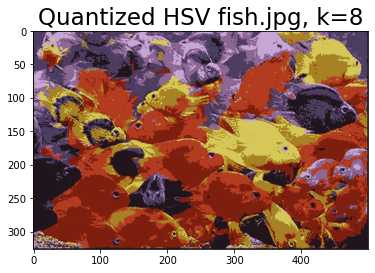

In [ ]:
# plotting HSV fish with k=8
input_HSV_fish_k8 = rgb2hsv(RGB_fish_k8)
input_HSV_fish_k8_uint8 = np.array(input_HSV_fish_k8*255,dtype='uint8')

HSV_fish_k8,HSV_fish_mean_k8 = quantizeHSV(input_HSV_fish_k8_uint8,8) 


plt.figure(figsize=(6,6))
plt.imshow(hsv2rgb(HSV_fish_k8))
plt.title('Quantized HSV fish.jpg, k=8',fontsize=23)

computeQuantizationError(input_HSV_fish_k8_uint8,HSV_fish_k8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove 

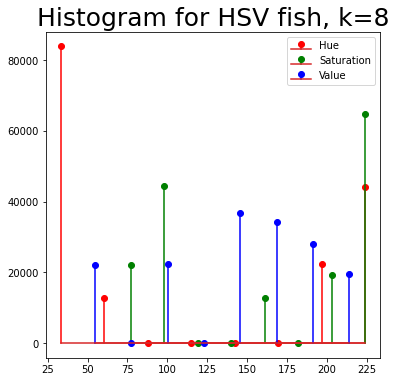

In [ ]:
COUNTS1,X1 = np.histogram(HSV_fish_k8[:,:,0],bins=8)
COUNTS2,X2 = np.histogram(HSV_fish_k8[:,:,1],bins=8)
COUNTS3,X3 = np.histogram(HSV_fish_k8[:,:,2],bins=8)

plt.figure(figsize=(6,6))
plt.stem(X1[1:len(X1)],COUNTS1,'r',markerfmt='ro',label='Hue')
plt.stem(X2[1:len(X2)],COUNTS2,'g',markerfmt='go',label='Saturation')
plt.stem(X3[1:len(X3)],COUNTS3,'b',markerfmt='bo',label='Value')
plt.title('Histogram for HSV fish, k=8',fontsize=25)
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a st

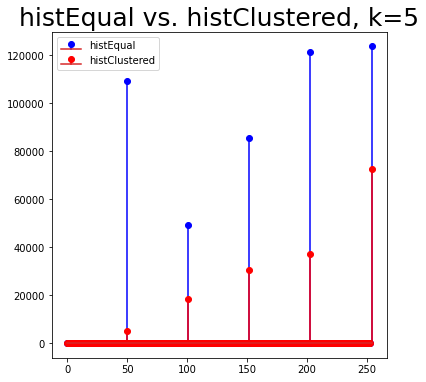

In [ ]:
k=5
x,y = getHueHists(fish,k)
X = np.arange(0,255,1)

plt.figure(figsize=(6,6))
plt.stem(X,x.T,'b',markerfmt='bo',label='histEqual')
plt.stem(X,y.T,'r',markerfmt='ro',label='histClustered')
plt.title('histEqual vs. histClustered, k=5',fontsize=25)
plt.legend()

# **Programming Part 2**

In [ ]:
a = np.array([[1,2],[8,7],[4,6]])
b = np.sort(a)

print(a)
a.flatten()

[[1 2]
 [8 7]
 [4 6]]


array([1, 2, 8, 7, 4, 6])

## **detectCircles.py**

In [ ]:
def ind2sub(array_shape, ind):
    rows = (ind.astype('int') / array_shape[1])
    cols = (ind.astype('int') % array_shape[1]) 
    return (rows, cols)

In [ ]:
def detectCircles(im,radius,useGradient):
  im = rgb2gray(im)
  im = im.astype(np.uint8)
  h,w = im.shape

  sobelx = cv2.Sobel(im,cv2.CV_64F,1,0)
  sobely = cv2.Sobel(im,cv2.CV_64F,0,1)
  grad_dir = np.arctan2(sobely, sobelx)
  thetaResolution = .01
  angle = np.arange(0,2*np.pi,thetaResolution)

  cos = np.cos(angle)
  sin = np.sin(angle)

  edges = cv2.Canny(im,100,150)

  centers_houghSpace = np.zeros((h,w))
  centers_centers = np.zeros((h,w,1))
  centers_votes = np.zeros((h,w))

  i = np.argwhere(edges > 1)[:,0]
  j = np.argwhere(edges > 1)[:,1]

  for count in range(0,len(i)):
    y = i[count]
    x = j[count]
    if useGradient == 1:
      theta = grad_dir[y,x]
      theta = np.array([[theta],[theta-np.pi]])
    else:
      theta = angle
    a = x + radius * cos
    a = a[a > w]
    a = a[a < 0]
    b = y + radius * sin 
    b = b[b > h]
    b = b[b < 0]

    centers_houghSpace[np.round(b), np.round(a)] = centers_houghSpace[np.round(b), np.round(a)] + 1
    return centers_houghSpace
  
  List = centers_houghSpace
  meanVote = np.mean(centers_votes[:])
  centers_votes = centers_votes[centers_votes < meanVote]
  
  orderedIndices = np.argsort(List.flatten())
  orderedIndices = np.flip(orderedIndices)
  centers_votes = np.sort(List.flatten())
  centers_votes = np.flip(centers_centers)
  centers_centers = np.reshape(orderedIndices, (h, w))

  row,col = ind2sub(centers_centers.shape, centers_centers)
  centers_coordinates = [row[0:20].T, col[0:20].T]

  return centers_centers,centers_coordinates,centers_houghSpace,centers_votes,edges

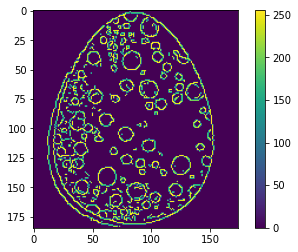

In [ ]:
e = cv2.Canny(egg,100,150)

plt.imshow(e)
plt.colorbar()

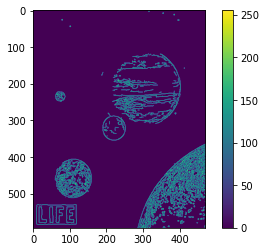

In [ ]:
e = cv2.Canny(jupiter,100,150)

plt.imshow(e)
plt.colorbar()

## **Part 2 b)**

In [ ]:
centers_centers,centers_coordinates,centers_houghSpace,centers_votes,edges = detectCircles(egg,70,1)


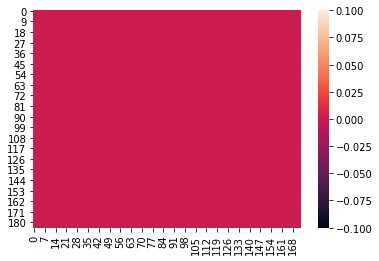

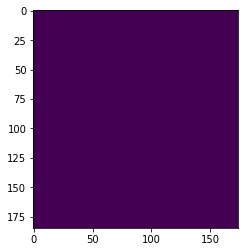

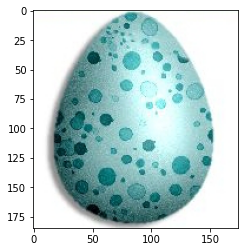

In [ ]:
#attempting to make to plots for egg
h,w,_ = egg.shape

row,col = ind2sub([h,w], centers_centers)

row = row.flatten()
col = col.flatten()

plt.figure()
sns.heatmap(data=centers_houghSpace)

plt.figure()
plt.imshow(edges)

plt.figure()
plt.imshow(egg)